# Introduction to Neural Network

The widespread adoption of artificial intelligence in recent years has been largely driven by advancement in neural networks. Neural networks is behind systems ranging from 
[AlphaGo](https://deepmind.com/research/alphago/),
[Google Translate](https://translate.google.com/)
to [Tesla Autopilot](https://www.tesla.com/en_HK/autopilot).

Neural network is fundamentally numeric computation, so any software with decent numeric computation capabilities can be used to construct and train a neural network. That said, while in theory you can construct a neural network in Excel, in practice it will be very troublesome since Excel is not designed with neural network in mind. Libraries are that specifically geared toward neural network include:
- Google's [Tensorflow](https://www.tensorflow.org/) and [Flax](https://github.com/google/flax)
- Facebook's [PyTorch](http://pytorch.org/)
- Microsoft's [CNTK](https://github.com/Microsoft/CNTK) (no longer in development)
- [Theano](http://deeplearning.net/software/theano/) and [Caffe](http://caffe.berkeleyvision.org/) (no longer in development)

In this course we will focus on using [`keras`](https://keras.io/), which is a high-level library for constructing neural networks. Keras runs on top of a numerical computation library of your choice, defaulting to `tensorflow`. A library such as Keras significantly simplify the workflow of constructing and training neural networks. 

<img src="../Images/nn_libraries.png" width="80%">

Before we start, we will first disable the server's GPU so that everything runs on its CPU. Later we will turn it back on to see how much speed up we can get. This setting has no effect if you do not have a (Nvidia) GPU.

In [48]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

## A Simple Example: Binary Neural Network Classifier

As a first example, we will train a neural network to the following classification task:

|y|x1|x2|
|-|-|-|
|0|1|0|
|1|0|1|

To be clear: there is absolutely no need to use neural network for such as simple task. A simpler model will train a lot faster and potentially with better accuracy.

We first generate the data:

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split

#Generate 2000 samples. [1,0] -> 0, [0,1] -> 1
X = np.repeat([[1,0]], 1000, axis=0)
y = np.repeat([0], 1000, axis=0)
X = np.append(X,np.repeat([[0,1]], 1000, axis=0),axis=0)
y = np.append(y,np.repeat([1], 1000, axis=0),axis=0)

#Shuffle and split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)

We will construct a neural network classifier for this task. 

A neural network model is made up of multiple layers. The simpliest model would have three layers:
- An *input layer*. This layer specify the nature of the input data. In this example, we only need to tell Keras that we have two variables to input.
- A *hidden layer*. This layer contains neuron(s) that process the input data.
- An *ouput layer*. The neurons in this layer process the output from the hidden layer and generate predictions. This layer contains as many neurons as the number of target variables we try to predict. 

Below is the simplest neural network one can come up with, with only one hidden neuron. The neuron computes the following function:
}
$$
F \left( b + \sum\nolimits_{i}{w_{i}x_{i}} \right)
$$

where $x_i$ are inputs, b the intercept (called *bias* in machine learning), $w_i$ coefficients (called *weights*) and $F$ is an *activation function*. In this example we will use the logistic function (also called the *sigmoid function*) as the activation function:

$$
F(z) = \frac{e^z}{1+e^z}
$$

So the neuron is essentially a logit regression.

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Set up layers 
inputs = Input(shape=(2,))
x = Dense(1, activation='sigmoid')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

# Set up model
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)  # starts training

Epoch 1/50
47/47 [==============================] - 0s 592us/step - loss: 0.6339 - accuracy: 0.5013
Epoch 2/50
47/47 [==============================] - 0s 509us/step - loss: 0.6215 - accuracy: 0.5013
Epoch 3/50
47/47 [==============================] - 0s 410us/step - loss: 0.6095 - accuracy: 0.5013
Epoch 4/50
47/47 [==============================] - 0s 454us/step - loss: 0.5976 - accuracy: 0.5013
Epoch 5/50
47/47 [==============================] - 0s 485us/step - loss: 0.5859 - accuracy: 0.5013
Epoch 6/50
47/47 [==============================] - 0s 445us/step - loss: 0.5740 - accuracy: 0.5013
Epoch 7/50
47/47 [==============================] - 0s 472us/step - loss: 0.5622 - accuracy: 0.5013
Epoch 8/50
47/47 [==============================] - 0s 481us/step - loss: 0.5503 - accuracy: 0.5013
Epoch 9/50
47/47 [==============================] - 0s 472us/step - loss: 0.5385 - accuracy: 0.5013
Epoch 10/50
47/47 [==============================] - 0s 481us/step - loss: 0.5267 - accuracy: 1.0000

Out-of-sample test can be conducted with ```model.evaluate()```:

In [8]:
model.evaluate(x=X_test,y=y_test)

16/16 [==============================] - 0s 325us/step - loss: 0.2083 - accuracy: 1.0000


[0.20833183825016022, 1.0]

The first number is the model's loss while the subsequent numbers are the metrics we specified. In our case, they are ```binary_crossentropy``` and ```accuracy``` respectively.

Unlike OLS, a neural network's performance could vary across runs. Run the code a few more times and see how the performance vary.

Make prediction (this is called *inference* in machine learning) with ```model.predict()```:

In [9]:
x = np.array([[0,1]])
print(model.predict(x))

[[0.7768973]]


## Activations

Different activation can have profound impact on model performance. Besides ```sigmoid```, which is just a different name for the logistic function, there are other activation function such as ```tanh``` and ```relu```. ```relu```, which stands for **RE**ctified **L**inear **U**nit, is a particular common choice due to its good performance.

In [15]:
# Replace 'sigmoid' with 'relu' for the hidden layer
inputs = Input(shape=(2,))
x = Dense(1, activation='relu')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs,outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
47/47 [==============================] - 0s 446us/step - loss: 0.5452 - accuracy: 1.0000
Epoch 2/50
47/47 [==============================] - 0s 459us/step - loss: 0.5233 - accuracy: 1.0000
Epoch 3/50
47/47 [==============================] - 0s 475us/step - loss: 0.5007 - accuracy: 1.0000
Epoch 4/50
47/47 [==============================] - 0s 467us/step - loss: 0.4776 - accuracy: 1.0000
Epoch 5/50
47/47 [==============================] - 0s 462us/step - loss: 0.4545 - accuracy: 1.0000
Epoch 6/50
47/47 [==============================] - 0s 467us/step - loss: 0.4317 - accuracy: 1.0000
Epoch 7/50
47/47 [==============================] - 0s 463us/step - loss: 0.4095 - accuracy: 1.0000
Epoch 8/50
47/47 [==============================] - 0s 454us/step - loss: 0.3880 - accuracy: 1.0000
Epoch 9/50
47/47 [==============================] - 0s 453us/step - loss: 0.3674 - accuracy: 1.0000
Epoch 10/50
47/47 [==============================] - 0s 452us/step - loss: 0.3481 - accuracy: 1.0000

Why is ReLU performing so much better than the logistic function? Let us take a look at the shape of each function:
<img src="../Images/logistic_v_relu.png">
The most prominent feature of the logistic function is that it is bounded between 0 and 1. This means it is virtually flat for very large or very small input values, and flat means small gradient. As gradient descent relies on gradient to learn, small gradient implies slow learning. ReLU avoids this issue by being linear above zero.

## Neural Network Regression

Next we are going use a neural network in a regression task. The true data generating process (DGP) is as follows:

$$
y = x^5 -2x^3 + 6x^2 + 10x - 5
$$

The model does not know the true DGP, so it needs to figure out the relationship between $y$ and $x$ from the data.

First we generate the data:

In [16]:
#Generate 1000 samples
X = np.random.rand(1000,1)
y = X**5 - 2*X**3 + 6*X**2 + 10*X - 5

#Shuffle and split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)

Then we construct the model:

In [17]:
# Single hidden layer with 100 neurons
inputs = Input(shape=(1,))
x = Dense(100, activation='relu')(inputs)
predictions = Dense(1, activation='linear')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='mean_squared_error')
model.fit(X_train,y_train,epochs=200)
model.evaluate(x=X_test,y=y_test)

Epoch 1/200
24/24 [==============================] - 0s 508us/step - loss: 21.9896
Epoch 2/200
24/24 [==============================] - 0s 524us/step - loss: 20.2422
Epoch 3/200
24/24 [==============================] - 0s 544us/step - loss: 18.6448
Epoch 4/200
24/24 [==============================] - 0s 501us/step - loss: 17.2450
Epoch 5/200
24/24 [==============================] - 0s 537us/step - loss: 16.0669
Epoch 6/200
24/24 [==============================] - 0s 533us/step - loss: 15.0782
Epoch 7/200
24/24 [==============================] - 0s 485us/step - loss: 14.3451
Epoch 8/200
24/24 [==============================] - 0s 468us/step - loss: 13.6923
Epoch 9/200
24/24 [==============================] - 0s 471us/step - loss: 13.0745
Epoch 10/200
24/24 [==============================] - 0s 464us/step - loss: 12.4410
Epoch 11/200
24/24 [==============================] - 0s 468us/step - loss: 11.7464
Epoch 12/200
24/24 [==============================] - 0s 489us/step - loss: 11.0271
E

0.2690861225128174

We are going to run the model through different settings. The function contains everything we have coded previously:

In [20]:
import time
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow.keras.backend as backend

def polyNN(data,
           hidden_count=100,
           epochs=200,
           batch_size=32,
           activation='relu'):
    
    #Record the start time
    start = time.time()
    
    #Unpack the data
    X_train, X_test, y_train, y_test = data
    
    #Layers
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(hidden_count, activation=activation)(inputs)
    predictions = Dense(1, activation='linear')(x)

    #Model
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='adam',
                  loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0) #Do not display progress
    
    #Collect and display info
    param_count = model.count_params()
    loss_tr = round(model.evaluate(x=X_train,y=y_train,batch_size=batch_size,verbose=0),4)
    loss_te = round(model.evaluate(x=X_test,y=y_test,batch_size=batch_size,verbose=0),4)
    elapsed = round(time.time() - start,2)    
    print("Hidden count:",str(hidden_count).ljust(5),
          "Parameters:",str(param_count).ljust(6),
          "loss (train,test):",str(loss_tr).ljust(7),str(loss_te).ljust(7),
          "Time:",str(elapsed)+"s",
         )
    
    backend.clear_session()

`clear_session()` is called at the end of the function to clear existing models from memory. This is important if you are working with multiple models&mdash;for example, when you run through different sets of hyperparameters&mdash;to avoid running out of memory.

Now we can easily try out different settings:

In [21]:
data = train_test_split(X,y)

polyNN(data,hidden_count=1)
polyNN(data,hidden_count=10)
polyNN(data,hidden_count=50)
polyNN(data,hidden_count=100)
polyNN(data,hidden_count=500)

Hidden count: 1     Parameters: 4      loss (train,test): 0.5281  0.4063  Time: 1.71s
Hidden count: 10    Parameters: 31     loss (train,test): 0.4216  0.3138  Time: 1.76s
Hidden count: 50    Parameters: 151    loss (train,test): 0.2844  0.2063  Time: 1.81s
Hidden count: 100   Parameters: 301    loss (train,test): 0.2402  0.1737  Time: 2.28s
Hidden count: 500   Parameters: 1501   loss (train,test): 0.2024  0.1464  Time: 2.65s


Here we see the universal approximation theorem in work: the more neurons we have the better the fit.

One trick that can often improve performance: *standardizing* data.

In [22]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler().fit(X)
X_std = scalar.transform(X)

data_std = train_test_split(X_std,y)

polyNN(data_std,hidden_count=1)
polyNN(data_std,hidden_count=10)
polyNN(data_std,hidden_count=50)
polyNN(data_std,hidden_count=100)
polyNN(data_std,hidden_count=500)

Hidden count: 1     Parameters: 4      loss (train,test): 19.7992 19.3042 Time: 1.66s
Hidden count: 10    Parameters: 31     loss (train,test): 0.0223  0.0214  Time: 1.72s
Hidden count: 50    Parameters: 151    loss (train,test): 0.0006  0.0007  Time: 1.79s
Hidden count: 100   Parameters: 301    loss (train,test): 0.0005  0.0006  Time: 2.16s
Hidden count: 500   Parameters: 1501   loss (train,test): 0.0     0.0     Time: 2.63s


While `StandardScaler` works quite well when there is only a single feature, its sensitivity to outliers makes it unsuitable for situations with mulitple highly unbalanced features. Scikit-learn offers <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py">other scalers</a> such as `RobustScaler` that might work better in those cases. 


Now let us run everything again with logistic activation:

In [23]:
polyNN(data,hidden_count=1,activation='sigmoid')
polyNN(data,hidden_count=10,activation='sigmoid')
polyNN(data,hidden_count=50,activation='sigmoid')
polyNN(data,hidden_count=100,activation='sigmoid')
polyNN(data,hidden_count=500,activation='sigmoid')

Hidden count: 1     Parameters: 4      loss (train,test): 9.2396  8.6183  Time: 1.65s
Hidden count: 10    Parameters: 31     loss (train,test): 0.1783  0.2086  Time: 1.75s
Hidden count: 50    Parameters: 151    loss (train,test): 0.1214  0.1338  Time: 1.81s
Hidden count: 100   Parameters: 301    loss (train,test): 0.1335  0.1406  Time: 2.18s
Hidden count: 500   Parameters: 1501   loss (train,test): 0.1888  0.2092  Time: 2.48s


In [24]:
polyNN(data_std,hidden_count=1,activation='sigmoid')
polyNN(data_std,hidden_count=10,activation='sigmoid')
polyNN(data_std,hidden_count=50,activation='sigmoid')
polyNN(data_std,hidden_count=100,activation='sigmoid')
polyNN(data_std,hidden_count=500,activation='sigmoid')

Hidden count: 1     Parameters: 4      loss (train,test): 5.8743  5.832   Time: 1.73s
Hidden count: 10    Parameters: 31     loss (train,test): 0.1123  0.1113  Time: 1.76s
Hidden count: 50    Parameters: 151    loss (train,test): 0.0222  0.0217  Time: 1.91s
Hidden count: 100   Parameters: 301    loss (train,test): 0.0122  0.0119  Time: 2.16s
Hidden count: 500   Parameters: 1501   loss (train,test): 0.0098  0.0098  Time: 2.48s


Did you notice how the logistic activation function actually performed better than ReLU when the data is not standardized? What we are seeing here is that ReLU is much more sensitive to data standardization than the logistic function. This is a good example why so much research goes into optimizing the modelling process&mdash;because every details matters.

<!--Further reading: <a href="https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79">Weight Initialization in Neural Networks: A Journey From the Basics to Kaiming</a>. These articles also contain links to the most important research papers when
http://deepdish.io/2015/02/24/network-initialization/
-->

### Dropout

As neural networks are highly flexible, they can easily overfit. Dropout is a regularization technique that works by randomly setting the outputs of some neurons to zero, thereby forcing the network to not rely too much on a specific neurons or feature. The function below added a 50% dropout to the hidden layer:

In [26]:
from tensorflow.keras.layers import Dropout

def polyNN(data,
           hidden_count=100,
           epochs=200,
           batch_size=32,
           activation='relu',
           dropout=0.5):
    
    #Record the start time
    start = time.time()
    
    #Unpack the data
    X_train, X_test, y_train, y_test = data
    
    #Layers
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(hidden_count, activation=activation)(inputs)
    x = Dropout(dropout)(x)
    predictions = Dense(1, activation='linear')(x)

    #Model
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='adam',
                  loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0) #Do not display progress
    
    #Collect and display info
    param_count = model.count_params()
    loss_tr = round(model.evaluate(x=X_train,y=y_train,batch_size=batch_size,verbose=0),4)
    loss_te = round(model.evaluate(x=X_test,y=y_test,batch_size=batch_size,verbose=0),4)
    elapsed = round(time.time() - start,2)    
    print("Hidden count:",str(hidden_count).ljust(5),
          "Parameters:",str(param_count).ljust(6),
          "loss (train,test):",str(loss_tr).ljust(7),str(loss_te).ljust(7),
          "Time:",str(elapsed)+"s",
         )
    
    backend.clear_session()

In [27]:
polyNN(data_std,hidden_count=1,activation='sigmoid')
polyNN(data_std,hidden_count=10,activation='sigmoid')
polyNN(data_std,hidden_count=50,activation='sigmoid')
polyNN(data_std,hidden_count=100,activation='sigmoid')
polyNN(data_std,hidden_count=500,activation='sigmoid')

Hidden count: 1     Parameters: 4      loss (train,test): 10.8034 10.7167 Time: 1.79s
Hidden count: 10    Parameters: 31     loss (train,test): 0.7187  0.7241  Time: 1.79s
Hidden count: 50    Parameters: 151    loss (train,test): 0.1166  0.1164  Time: 1.83s
Hidden count: 100   Parameters: 301    loss (train,test): 0.0736  0.0752  Time: 2.38s
Hidden count: 500   Parameters: 1501   loss (train,test): 0.0383  0.038   Time: 3.49s


## Speed Things Up

Due to its complexity, neural network trains a lot slower than the other techniques we have covered previously. To speed up training, we can ask Keras to go through more samples before updating the model's parameters by specifying a larger ```batch_size```. Doing so allows Keras to make better use of the CPU's parallel processing capabitilies.

Keras' default batch size is 32. We will try 128 instead:

In [28]:
batch_size = 128
polyNN(data_std,hidden_count=1,batch_size=batch_size)
polyNN(data_std,hidden_count=10,batch_size=batch_size)
polyNN(data_std,hidden_count=50,batch_size=batch_size)
polyNN(data_std,hidden_count=100,batch_size=batch_size)
polyNN(data_std,hidden_count=500,batch_size=batch_size)

Hidden count: 1     Parameters: 4      loss (train,test): 16.2493 15.4326 Time: 0.67s
Hidden count: 10    Parameters: 31     loss (train,test): 1.0389  0.9916  Time: 0.7s
Hidden count: 50    Parameters: 151    loss (train,test): 0.2795  0.2678  Time: 0.93s
Hidden count: 100   Parameters: 301    loss (train,test): 0.0546  0.0527  Time: 1.04s
Hidden count: 500   Parameters: 1501   loss (train,test): 0.006   0.006   Time: 1.61s


Holding the number of epochs constant, what you should see with a larger batch size is faster training but also larger error. The latter is due to the fact that we are updating the parameters less often, resulting in slower learn. This can be countered by increasing the number of epochs.

## Running Model on GPU

If you have a GPU in your computer, you can now turn it on to see how much it speeds up the process of training.

In [46]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [30]:
polyNN(data,hidden_count=1)

Hidden count: 1     Parameters: 4      loss (train,test): 9.147   8.3436  Time: 1.8s


With a GPU you can take advantage of its high number of core count by setting a much higher batch size, such as 1000:

In [ ]:
batch_size = 1000
polyNN(data,hidden_count=1,batch_size=batch_size)
polyNN(data,hidden_count=10,batch_size=batch_size)
polyNN(data,hidden_count=50,batch_size=batch_size)
polyNN(data,hidden_count=100,batch_size=batch_size)
polyNN(data,hidden_count=500,batch_size=batch_size)

To compensate for the less frequent update, we can increase the number of epochs:

In [ ]:
batch_size = 1000
epochs = 600
polyNN(data,hidden_count=1,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=10,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=50,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=100,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=500,epochs=epochs,batch_size=batch_size)

### MNIST
MNIST is a dataset of 70000 handwritten digits. It is often used to teach image recognition due to its simplicity. 

In [37]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Each sample consists of a 28x28 monochome image of a handwritten digit stored as a 2D numpy array:

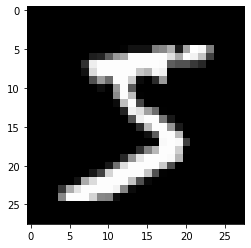

In [38]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

Target is digit's value:

In [39]:
y_train[0]

5

For classification task, the common practice is to have one output neuron per class. We can use `keras.utils.to_categorical()` to convert the target value to a dummy vector:

In [42]:
y_train = keras.utils.to_categorical(y_train, 10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

We will use a single-layer fully-connected network withe 100 hidden neurons. There are two more preprocessing tasks that we need to handle: flattening the 2D array into 1D and normalizing the features from 0-255 to 0-1:

In [43]:
# Settings
batch_size = 128
epochs = 30
pixel_count = 28 * 28
num_classes = 10 # target classes (0-9)

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten each image to a vector
x_train = x_train.reshape(len(x_train),pixel_count)
x_test = x_test.reshape(len(x_test),pixel_count)

# Normalize features
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model
inputs = Input(shape=(pixel_count,))
x = Dense(100, activation='relu')(inputs)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train and evaluate
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs)
model.evaluate(x_test,y_test)

Epoch 1/30
469/469 [==============================] - 1s 1ms/step - loss: 0.3838 - accuracy: 0.8942
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.9489
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1307 - accuracy: 0.9622
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9699
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9750
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9793
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0612 - accuracy: 0.9824
Epoch 8/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9851
Epoch 9/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0451 - accuracy: 0.9870
Epoch 10/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0388 - accuracy: 0.9891

[0.09952200949192047, 0.9778000116348267]

With just 100 neurons we are able to achieve a 97% accuracy. With a more advanced convolutional network we should be able to do even better:

In [49]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

#Settings
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Features has to be in the following shape: (obs, rows, cols, color channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalize features
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Construct model using sequential syntax
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
469/469 [==============================] - 11s 23ms/step - loss: 0.4829 - accuracy: 0.8476 - val_loss: 0.1021 - val_accuracy: 0.9673
Epoch 2/30
469/469 [==============================] - 10s 22ms/step - loss: 0.1680 - accuracy: 0.9511 - val_loss: 0.0669 - val_accuracy: 0.9776
Epoch 3/30
469/469 [==============================] - 10s 22ms/step - loss: 0.1230 - accuracy: 0.9640 - val_loss: 0.0568 - val_accuracy: 0.9811
Epoch 4/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0993 - accuracy: 0.9711 - val_loss: 0.0435 - val_accuracy: 0.9855
Epoch 5/30
469/469 [==============================] - 11s 22ms/step - loss: 0.0842 - accuracy: 0.9757 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 6/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0764 - accuracy: 0.9781 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 7/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0703 - accuracy: 0.9799 - val_loss: 0.0349 - val_accuracy:

Here is a very nice 3D visualization of what is going on inside a trained CNN: https://www.cs.ryerson.ca/~aharley/vis/conv/.
I have set up the model above to resemble the one in the visualization. There are many hyperparameters that you can try adjusting to improve its performance&mdash;the number of layers, the number of filters, the size of the kernel, the type of activation and dropout ratio, etc.